# Метод Монте-Карло в физике

Методом Монте-Карло называют целую множество различных метоедов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('seaborn-dark')
%matplotlib inline
from tqdm import tqdm
rand = np.random.RandomState(18121980)

# Спасибо маме за нерабочий %matplotlib notebook.

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
(10% от общей оценки)

Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)} R^d
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [2]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R рекурентным методом

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = np.pi ** (D / 2) / sp.gamma(1 + D / 2) * R ** D
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

In [3]:
V_3 = getSphereVolumeExact(3)
V_3, 4 / 3 * np.pi

(4.188790204786391, 4.1887902047863905)

In [4]:
V_2 = getSphereVolumeExact(2)
V_2, np.pi

(3.141592653589793, 3.141592653589793)

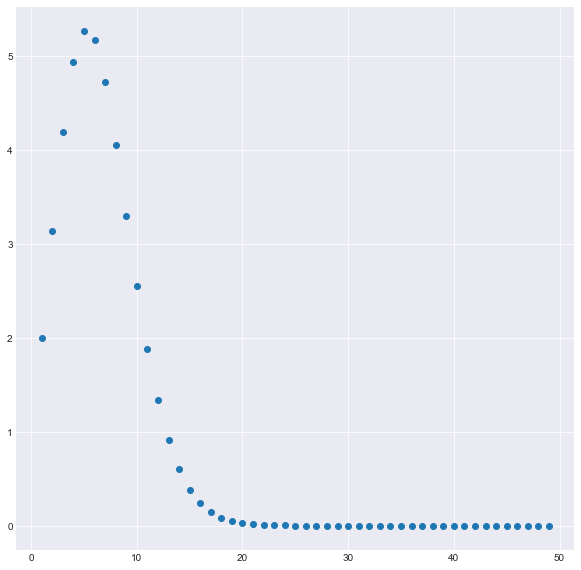

In [5]:
plt.figure(figsize=(10, 10))

d = np.arange(1, 50)
plt.plot(d, getSphereVolumeExact(d), "o")
plt.grid()
plt.show()

### Задание 1.2
(20% от общей оценки)

Напишите функцию, вычсляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [6]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    randoms = np.random.uniform(low=-1, high=1, size=(D, N))
    a = ((randoms ** 2).sum(axis=0) <= 1.)
    V = ((2 * R) ** D) * np.sum(a) / N
    return V

Постройте график зависимости числа узлов $N$ при котором достигается относительная точность порядка $10^{-8}$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$. Для нахождения соответствующего $N$ используйте алгоритм удвоения $N$, который вы использовали для оценки точности интегралов в 6-ой домашней работе.

In [7]:
def eps(V_ex, V_rand):
    return (V_ex - V_rand) / V_ex

In [8]:
%%time
N_array_Pseudo = []

for d in tqdm(range (1, 10)):
    N = 100
    V_ex = getSphereVolumeExact(d)
    V_rand = getSphereVolumePseudorandom(N, d)
    while abs(eps(V_ex, V_rand)) >= 1e-2:
        N *= 2
        V_rand = getSphereVolumePseudorandom(N, d)
    N_array_Pseudo.append(N)

100%|██████████| 9/9 [00:00<00:00, 22.16it/s]CPU times: user 216 ms, sys: 70.7 ms, total: 287 ms
Wall time: 438 ms



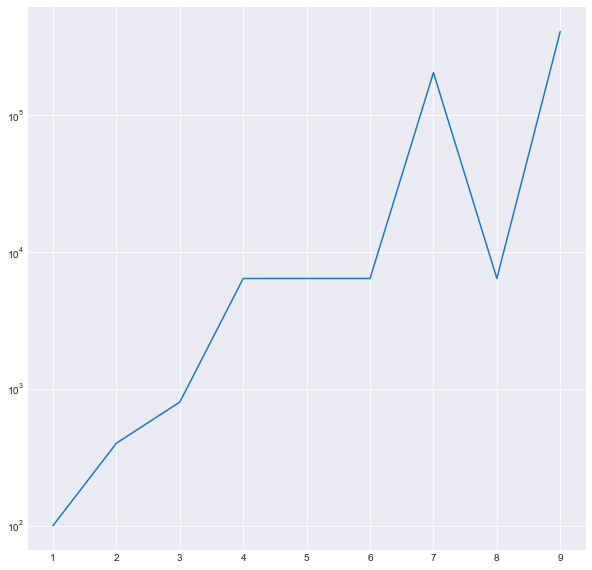

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1, 10), N_array_Pseudo, '-')
plt.yscale('log')
plt.grid()
plt.show()

### Задание 1.3

(20% от общей оценки)

Напишите функцию, вычсляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq` выполните команду 
`pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


pip install sobol_seq --user

In [10]:
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [11]:
sobol_seq.i4_sobol_generate?

Signature: sobol_seq.i4_sobol_generate(dim_num, n, skip=0)
Docstring:
i4_sobol_generate generates a Sobol dataset.

Parameters:
  Input, integer dim_num, the spatial dimension.
  Input, integer N, the number of points to generate.
  Input, integer SKIP, the number of initial points to skip.

  Output, real R(M,N), the points.
File:      ~/.local/lib/python3.7/site-packages/sobol_seq/sobol_seq.py
Type:      function


In [12]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    randoms = sobol_seq.i4_sobol_generate(D, N)
    a = ((randoms ** 2).sum(axis=1) <= 1.)
    V = ((2 * R) ** D) * np.sum(a) / N
    return V

Сравните точность вчисления объема для квазислучайной погрешности, построив такой же график $N(D)$ при которых достигается точность $10^{-8}$, как для псевдослучайных чисел.

In [13]:
%%time
N_array_Quasi = []

for d in tqdm(range(1, 10)):
    N = 100
    V_ex = getSphereVolumeExact(d)
    V_rand = getSphereVolumeQuasirandom(N, d)
    while abs(eps(V_ex, V_rand)) >= 1e-2:
        N *= 2
        V_rand = getSphereVolumeQuasirandom(N, d)
    N_array_Quasi.append(N)

100%|██████████| 9/9 [00:10<00:00,  1.15s/it]CPU times: user 10 s, sys: 96.8 ms, total: 10.1 s
Wall time: 10.4 s



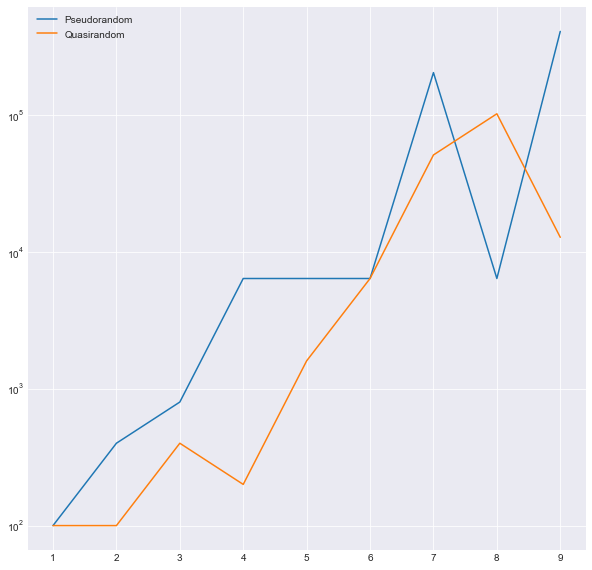

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1, 10), N_array_Pseudo, '-', label='Pseudorandom')
plt.plot(np.arange(1, 10), N_array_Quasi, '-', label='Quasirandom')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

Сделайте выводы об эффективности квазислучайных последовательностей. 

* Видно, что квазирандом для наших целей в целом работает лучше (обычно) (требует меньше точек для той же точности), чем псевдорандом. Результаты, кажется, меньше зависят от везения (в случае с псевдонадомом число точек может сильно меняться).

## Задание 2

(50% от общей оценки)

Рассмотрим решетку $n\times n$ в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние когда все спины одинаково ориентированы. Однако при ненлевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблемотичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):

1. Задаем случайное начальное состояние

2. Выбираем случайную ячейку

3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.

4. Если изменение энергии отрицательное, оставляем спин перевернутым

5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью с вероятностью $\exp(-\delta E/kT)$

6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [15]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = rand.choice([1, -1], (N, N))
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [16]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    
    state_ = np.hstack((state, state, state))
    state_n = np.vstack((state_, state_, state_))
    n = state.shape[0]

    dE = 2 * (state_n[n + i, n + j - 1] + state_n[n + i, n + j + 1] + state_n[(n + i) - 1, n + j] + state_n[(n + i) + 1, n + j]) * state[i, j]

    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. Можете использовать как псевдослучайную, так и квазислучайную последовательность, на ваш выбор. 

Обратите внимание, что если вам нужно сгенерировать большое количество случайных чисел и далее использовать их в цикле, то быстрее будет за один раз сгенерировать нужное количество случайных чисел и потом использовать их, чем генерировать их по одному в цикле. 

In [17]:
def makeFlip(T, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state_new - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    n = state.shape[0]
    state_new = state.copy()
    array_i = rand.randint(0, n, size=(n ** 2))
    array_j = rand.randint(0, n, size=(n ** 2))
    dE_array = np.empty(n ** 2)

    for k in range(n ** 2):
        dE = getDeltaE(array_i[k], array_j[k], state_new)
        assist = rand.random()
        flip = (np.exp(- dE / T) >= assist)
        if flip:
            state_new[array_i[k], array_j[k]] *= -1

    return state_new

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [18]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    E = 0.
    n = state.shape[0]

    for i in range(n):
        for j in range(n):         
            state_ = np.hstack((state, state, state))
            state_n = np.vstack((state_, state_, state_))
            E -= (state_n[n + i, n + j - 1] + state_n[n + i, n + j + 1] + state_n[(n + i) - 1, n + j] + state_n[(n + i) + 1, n + j]) * state[i, j]

    return E / 2 # Иначе каждая связь учитывается дважды.

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [19]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = state.sum()
    return M

Далее задаются начальные параметры: 
**Nt** - количество точек по температуре, 
**N** - линейный размер решетки, 
**eqStep** - количество попыток переворота спина в течение которых система приводится к равновесному сосотоянию, обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,
**steps** - количество попыток переворота спина в течение на которых рассчитывается значения энергии и намагниченности, нужно для усреднения случайных значений

Подберите наибольшие значения этих параметров таким образом, что бы ваша программа выполнялась выполнялась за разумно короткое время 

In [20]:
N       = 40         # размер решетки NxN
Nt      = 60         # количество точек температуры
eqSteps = 1000       # количество раз выполнения makeFlip для установления равновесия
steps   = 50         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.1, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

Далее представлен основной блок программы, соединяющий всё написанное выше в одно целое. Здесь, в цикле по точкам температуры, задается случайное начальное состояние, приводится к равновесному, и далее вычисляется средние значения энергии и намагниченности, и строится их график.

In [21]:
for t in tqdm(range(Nt)):
    
    Esum = Msum = 0
    state = getInitialState(N)
    state2 = state.copy()
    
    for i in range(eqSteps):         # установление статистического равновесия
        state = makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        state = makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

100%|██████████| 60/60 [53:38<00:00, 53.65s/it]Done


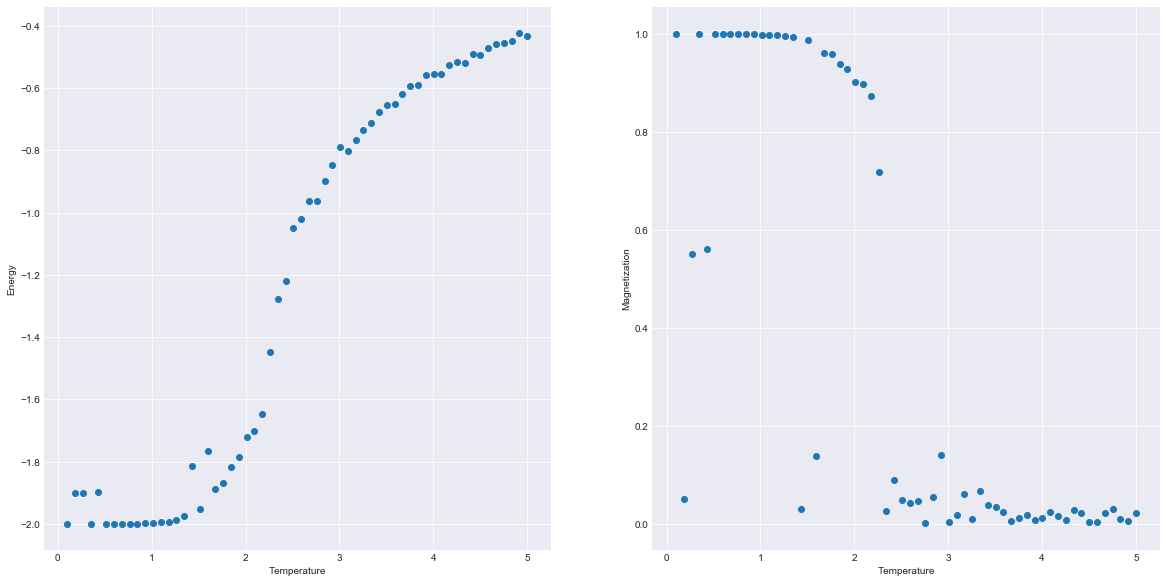

In [22]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(T, E)
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(T, abs(M))
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.grid()

plt.show()

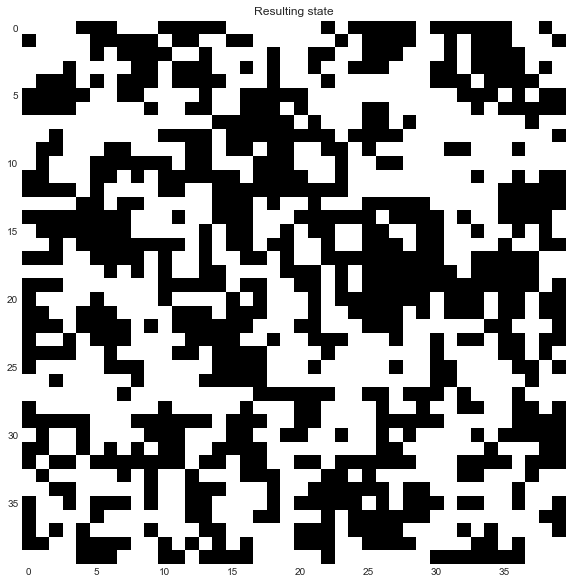

In [23]:
# Ради интереса

plt.figure(figsize=(10, 10))
plt.imshow(state)
plt.title('Resulting state')
plt.show()

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение феромагнетиков и фазовые переходы?

Вроде бы описывает. Фазовый переход второго рода, все дела. В намагниченности в самом начале вообще говоря должен быть такой аккуратный загиб вниз (потом резкий провал вниз и уже потом эти колебания около нуля), и на некоторых сидах (и при некоторых параметрах) я его видел, чесслово. Эту картинку решил оставить потому что тут энергии кросево получились.

Дополнительно. Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое. 

In [24]:
N = 64
state_low = getInitialState(N)

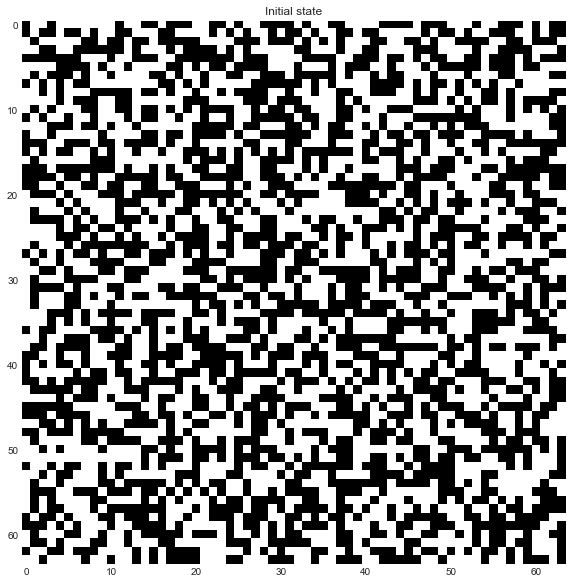

In [25]:
plt.figure(figsize=(10, 10))
plt.imshow(state_low)
plt.title('Initial state')
plt.show()

In [26]:
state_high = state_low.copy()

In [27]:
for i in range(100):
    state_low = makeFlip(0.01, state_low)
    state_high = makeFlip(13., state_high)

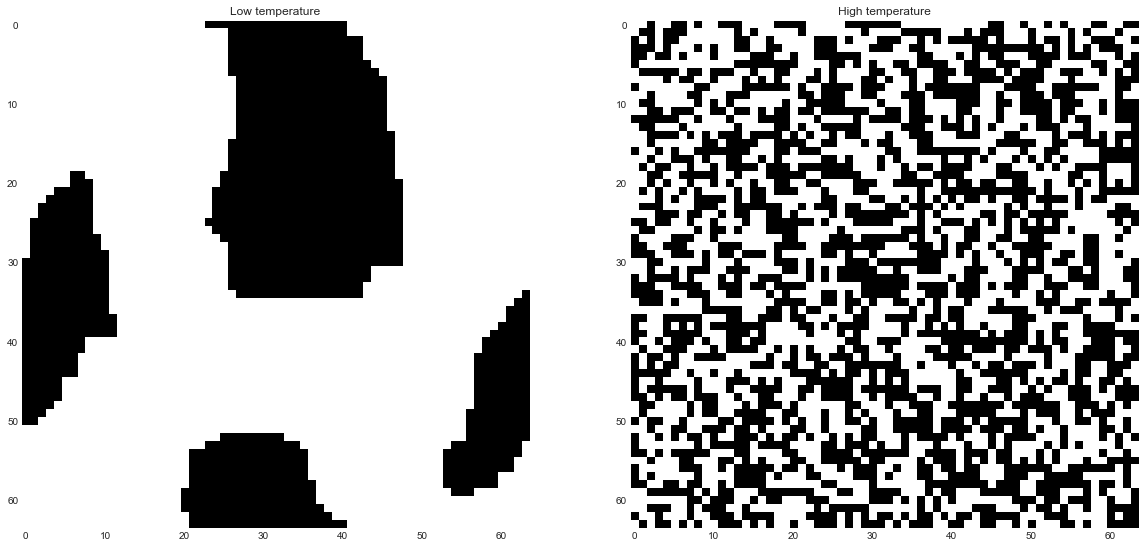

In [28]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(state_low)
plt.title('Low temperature')

plt.subplot(1, 2, 2)
plt.imshow(state_high)
plt.title('High temperature')

plt.show()

* При малых температурах система становится более упорядоченной, спины стремятся к одному состоянию. При большой температуре хаос остается (как и должно быть).